In [6]:
from common_immunogit import *

2025-04-01 16:00:24,267 - INFO - Root path: /Users/guillaume.souede/PycharmProjects/immunogit
2025-04-01 16:00:24,268 - INFO - Directory structure set up successfully.


AttributeError: 'VennDiagram' object has no attribute 'subset_sets'

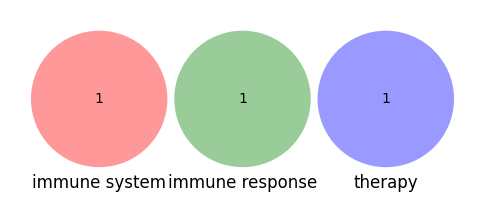

In [26]:
from matplotlib_venn import venn3

# Define sets for the main circles based on title_keywords
venn_sets = {
    keyword: set(
        df_counts[
            (df_counts["Category"] == "Title") & (df_counts["Term"] == keyword)
        ].index
    )
    for keyword in title_keywords
}

# Plot Venn diagram
plt.figure(figsize=(6, 6))
venn = venn3(
    [venn_sets["immune system"], venn_sets["immune response"], venn_sets["therapy"]],
    set_labels=title_keywords,
)

# Add counts to the Venn diagram
for subset_label, subset_set in zip(venn.subset_labels, venn.subset_sets):
    if subset_label and subset_set:
        count = len(subset_set)
        subset_label.set_text(f"{count}")

# Adjust font size and add title
for subset in venn.subset_labels:
    if subset:
        subset.set_fontsize(10)

plt.title("Venn Diagram: Title Keywords and Tags")
plt.show()


In [ ]:
""" Basic Dataframe for Metrics """
file_path = str(root_path / "metadata/model_metadata_tags.json")
with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)

# for the titles
title_keywords = ["immune system", "immune response", "therapy"]

tag_counts = defaultdict(int)

title_classification = {}

for model_id, model_info in data.items():
    title = model_info.get("title", "").lower()
    title_category = "OTHER"

    for keyword in title_keywords:
        if keyword in title:
            title_category = keyword
            break

    title_classification[model_id] = title_category

    if "tags" in model_info:
        for tag in model_info["tags"]:
            if ":" in tag:
                _, term = map(str.strip, tag.split(":", 1))
                tag_counts[term.lower()] += 1

count_table = []

for category, terms in keywords_dict.items():
    for term in terms:
        term_lower = term.lower().strip() # lowercase, no spacing !
        count = tag_counts.get(term_lower, 0)
        count_table.append({"Category": category, "Term": term, "Count": count})

# classify per titles
count_table.append({"Category": "Title", "Term": "immune system", "Count": list(title_classification.values()).count("immune system")})
count_table.append({"Category": "Title", "Term": "immune response", "Count": list(title_classification.values()).count("immune response")})
count_table.append({"Category": "Title", "Term": "therapy", "Count": list(title_classification.values()).count("therapy")})
count_table.append({"Category": "Title", "Term": "OTHER", "Count": list(title_classification.values()).count("OTHER")})

df_counts = pd.DataFrame(count_table)
df_counts.to_csv("model_metadata_counts.tsv", sep='\t', index=False)

In [22]:
df_counts

,Category,Term,Count
0,Cells,T helper cells,0
1,Cells,B cells,1
2,Cells,Cytotoxic T cells,0
3,Cells,Plasma cells,0
4,Cells,Tumor cells,10
...,...,...,...
111,Global,Data integration,0
112,Title,immune system,0
113,Title,immune response,0
114,Title,therapy,0
